# Linear Regression From Scratch

Linear regression is a foundational supervised learning algorithm that models a *continuous* target variable as a weighted linear combination of input features. It provides a simple, interpretable baseline for understanding relationships in data and is widely used for both inference and predictive modeling.

**Assumptions**:
1. The features values x are iid (independent and identically distributed) - generated independantly from the same distribution.
2. The residuals (model errors) are normally distributed. Normality supports valid confidence intervals, hypothesis tests and p-values.
    - How to know? Q-Q plots
3. Homoskedasticity => Errors/Residuals have constant variance. 
    - How to know? residual plots
    - Solution to resolve heteroskasticity: take log transform or variance-stabilizing transformations. 
4. No multicollinearity => if exists, unstable coefficients and difficult interpretation
    - How to know? correlation matrix, PCA, variation inflation factor.
5. No Endogeneity => No Correlation Between Errors and Predictors.
    - Common causes: Omitted variables, measurement error


### Numerical Form
$ {y}_i = w^\top x_i $

How to find the coefficients?

| Scenario                              | Normal Equation | Gradient Descent |
| ------------------------------------- | --------------- | ---------------- |
| Small dataset, few features           | ✔️ Best         | —                |
| Large dataset (many samples)          | —               | ✔️ Best          |
| High-dimensional data (many features) | —               | ✔️               |
| Need exact closed-form solution       | ✔️              | —                |
| Memory constraints                    | —               | ✔️               |
| Online / streaming learning           | —               | ✔️               |
| Regularized models (Ridge/Lasso)      | Limited         | ✔️               |


### How to evaluate?
- Mean Squared Error (MSE)
- R-Squared Loss 
- Mean Absolute Error (MAE)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - w^\top x_i)^2
$$
$$
{R^2} = \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

### Handling categorical variables
- one-hot encoding (full rank): remember to drop intercept!
    Suppose a categorical variable has k categories.
    If you create k dummy variables and include an intercept (a column of 1’s), you introduce perfect multicollinearity.
- one-hot encoding (with a reference category)

## Finding Coefficients


In [85]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.learning_rate = 10**-5
        self.n_iterations = 1000
        self.num_samples = 0
        self.num_features = 0

    
    def normal_eq(self, X, y): 
        # θ = (XᵀX)⁻¹ Xᵀy   
        self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def gradient_descent(self, X, y_actual):
        
        for _ in range(self.n_iterations):
            y_pred = self.bias + np.dot(X, self.weights)

            # calculate gradients
            dw = (1 / self.num_samples) * np.dot(X.T, y_pred - y_actual)
            db = (1 / self.num_samples) * np.sum(y_pred - y_actual)

            # update values for w and b
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

        return

    def fit(self, X, y, mode="gradient_descent", lr=0.01):
        
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)
        if X.ndim == 1:
                X = X.reshape(-1, 1)

        assert len(X) == len(y), "The number of samples should be same for X and y."

        self.num_samples, self.num_features = X.shape
        self.weights = np.random.rand(self.num_features)
        self.bias = 0
        self.learning_rate = lr

        if mode == "normal":
            self.normal_eq(X, y)
        else:
            self.gradient_descent(X, y)        

    def predict(self, X):
        y_pred = self.bias + np.dot(X, self.weights)
        return y_pred 
    

In [86]:
def mse(y_pred, y_actual):
    n = len(y_pred)
    return np.round(1/n * np.sum((y_pred - y_actual)**2), 3)

def r_squared_loss(y_pred, y_actual):
    num = np.sum(np.square(y_actual - y_pred))
    denom = np.sum(np.square(y_actual - np.mean(y_actual)))
    return np.round(num/denom, 3)

## Lets try it out!!

Advertising Dataset
This dataset contains data about the sales of a product in relation to the advertising budgets spent on TV, radio and newspaper. It's commonly used to explore the relationship between advertising efforts and sales. Data source: https://www.geeksforgeeks.org/machine-learning/dataset-for-linear-regression/
- Labels: Continuous values representing sales of the product (in thousands of units).
- Size: 200 samples each with 4 attributes.
- Data: Numerical data

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/advertising.csv")
display(data.head(2)) 

X = data.drop("Sales", axis=1)
y = data["Sales"]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


weights: [0.10627359 0.61887518 0.1136101 ]
bias: -0.000211031171302411
mse loss:  441.33


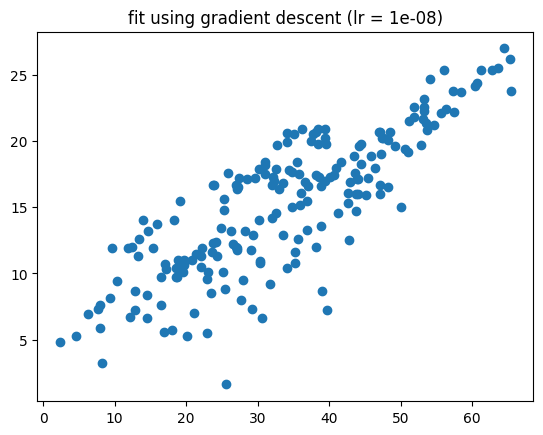

In [88]:
model = LinearRegression()
model.fit(X, y, mode="gradient_descent", lr = 10**-8)
y_pred = model.predict(X)

# iterations = 100, lr = 0.01
print("weights:", model.weights)
print("bias:", model.bias)
print("mse loss: ", mse(y_pred, y))

plt.scatter(y_pred, y)
plt.title(f"fit using gradient descent (lr = {10**-8})")
plt.show()

#### The learning seems a bit slow => Increasing the learning rate (or increase n_iterations)

weights: [ 0.0643701   0.24225377 -0.0169362 ]
bias: -0.0031226287022004112
mse loss:  7.502


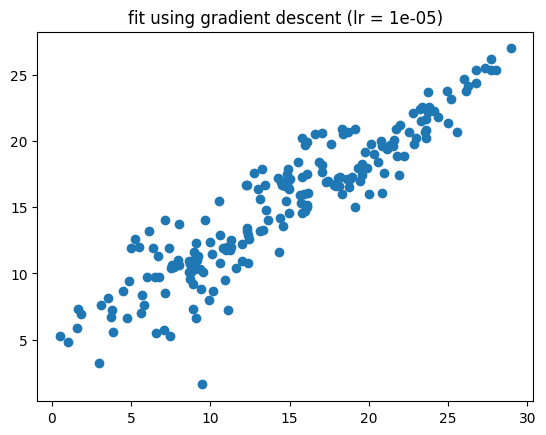

In [76]:
model = LinearRegression()
model.fit(X, y, mode="gradient_descent", lr = 10**-5)
y_pred = model.predict(X)

# iterations = 100, lr = 0.01
print("weights:", model.weights)
print("bias:", model.bias)
print("mse loss: ", mse(y_pred, y))

plt.scatter(y_pred, y)
plt.title(f"fit using gradient descent (lr = {10**-5})")
plt.show()

weights: [0.06707876 0.16003288 0.02843349]
bias: 0
mse loss:  5.829


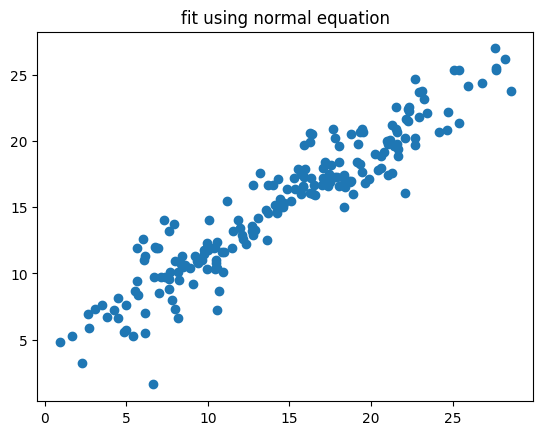

In [51]:
model = LinearRegression()
model.fit(X, y, mode="normal")
y_pred = model.predict(X)

print("weights:", model.weights)
print("bias:", model.bias)
print("mse loss: ", mse(y_pred, y))

plt.scatter(y_pred, y)
plt.title("fit using normal equation")
plt.show()

### Things could be experimented with further
1. Add regularization
2. Validate assumptions (check for multicollinearity, heteroskasticity, ..)